# Which teams are in?
By Clayton Boone

In [1]:
exec(open('hockey_code.py').read())
#only run once

C:\Users\Clayton\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Purpose of this project

In the NHL the main goal for every team is to win the stanley cup at the end of each season, but in order for a team to win the stanley cup they must first make the playoffs. For this project I wanted to see if I could build a model that could predict weither or not a team would make the nhl playoffs. Instead of just determining if a team would make the playoffs I wanted to look at a whole seasons worth of data and see if I could predict which 16 teams would make the playoffs for that season.When building models I wanted to make sure the models that I built could make mid season prediction, so I had to be carful with what type of data I used for the models I was building.     

# Cleaning the data

I scraped all my data from Hockeyreference.com. My data includes all season statistics for each team during the 1985 season to 2017 season. Each row in my data set represented a teams season statistics for a ceartain year, each row has a denoted year associated with it and represents how a team did during that year. The original data set has 34 features such as team name, games played, wins, loses, ties, goals scored, goals allowed, power play %, penalty kill %, shots allowed, shots forced, and many other statistics that are used to analyze teams in the NHL. The data also had 795 rows of entries. Since I wanted my models to be able to make midseason predictions I had to becareful with what features I used for my models and had to really think about what each feature represented. I had to use features that did not rely on the number of games that a team has played, so I decided to use features that were measured on a per game basis or were calculated using real time information based on the games that have been played. The features I used to test and train my model include team name , penalty kill %, power play %, goals forced per game, goals allowed per game, penalty minutes per game, opponents penalty minutes per game, shots forced per game, shots allowed per game, and save %. The target variable that was used in this project was weither or not a team made the playoffs. If a team made the playoffs then there would be a 1 in the playoff colunm. If a team did not make the playoffs then their will be 0 in the playoff colunm. 

I calculated the goals forced per game feature by taking a teams total goals scored and dividing it by the total amount of games that team has played, the goals against feature is calculated the same way but I used total goals allowed instead of total goals scored. Penalty kill % reprsents how effective a team is when they are short handed and are killing off a penalty. When a team is on a penalty kill that means they are playing with either 4 or 3 players for the allotted time of the penalty while the other team has 5 players on the ice. Penalty kill % is calulated by dividng the penalty kills where no goals were scored by the total amount of prenalty kills. Power play % tells how succesful a teams power play unit is and how often they score when they are on the power play. A team is on the power play if the other team has been given a penalty, this means they have 5 players on the ice while the other team has 4 to 3 players on the ice. Power play % is calculated by dividing the succesful powerplays by the total number of powerplays a team has had over the length of that season. Penalty minutes per game tells use the amount of penalty minutes a team has incurred based on a per game basis. Opponents penalty minutes per game tells us how many minutes the opponents of a ceartin team obtain based on a per game basis. I calculated the shots forced per game for each team by dividing the total amount of shots a team has taken by the total amount of games a team has played. Shots against per game was calculated the same way but used total shots against instead. These two features just described tells the averge shots for and against a team gets during a game. Save % is calulated by dividing the number of saves by the number of shots against that a team accumulates during the season. 

For each model I did not use the team name so that that the models would not give any unfair advantages to ceartain teams. I also did not want to use team names because I did not want the models to create any patterns with the training set because historically some teams make the playoffs more then other teams.

# Models for 2018 playoff predictions

The series below shows all the teams that made the playoffs in 2018. We will compare our results to this series to see how accurate our models our. For the 2018 season data I had to assign the conference and division for each team. The code to see how I assigned the conference and division for each team can be found in the py file that is attached with this notebook. 

In [2]:
made_2018 = season_18[season_18['playoff_1'] == 1].iloc[:,1]
made_2018

0       Nashville Predators
1             Winnipeg Jets
2             Boston Bruins
3       Tampa Bay Lightning
4      Vegas Golden Knights
5       Washington Capitals
6       Toronto Maple Leafs
7            Minnesota Wild
8           San Jose Sharks
9       Pittsburgh Penguins
10    Columbus Blue Jackets
11        Los Angeles Kings
12        New Jersey Devils
13            Anaheim Ducks
14      Philadelphia Flyers
15       Colorado Avalanche
Name: Unnamed: 1, dtype: object

# Gaussian Naive Bayes Unscaled

For my first round of models I decided to run all my models with unscaled data. The first model I decided to use was gaussian naive bayes. For this model I used the grid search function to  conduct 10 fold cross validation on the data. The accuracy score for naive bayes with 10 fold cross validation was about 78.9937%. This model was ran with data from 1985 to 2017, so the model never fit the data for the 2018 season. To see what teams this model picked to make the play offs I used the predict prob function on the 2018 data to see how probable it was for each team to make the playoffs. This metric told me how likely each team was to make the playoffs. 

In [3]:
from sklearn.naive_bayes import GaussianNB
gb_param = {'priors':[None]}
nb_model = GridSearchCV(GaussianNB(),gb_param,cv = 10)
nb_fitted_model = nb_model.fit(feat.iloc[:,1:],target)
nb_fitted_model.best_score_

0.789937106918239

At first I thought it would be a good idea to just predict the results for each team in the 2018 season and then all the teams that came back with a prediction of 1 would be in the playoffs, but this idea would not work because the model could easly pick more that 16 teams to make the playoffs and that is not possible. This statement can be seen below when looking at the list that was outputed using this model. This idea did allow me to see that the gaussian naive bayes model was about 83.87097% accurate when predicting the outcomes for all the teams during the 2018 season.

In [4]:
nb_best_fit = nb_fitted_model.best_estimator_
pred_unscaled_nb = nb_best_fit.predict(feat_2018.iloc[:,1:])
print(pred_unscaled_nb)
print('accuracy for 2018 season: ',accuracy_score(target_2018,pred_unscaled_nb))

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0]
accuracy for 2018 season:  0.8387096774193549


As stated above the next idea I had was to look at the probabilities for each team and see how probable it was for them to make the play offs and how probable it was for them not to make the play offs. I decided to sort all the teams based on each teams probability to make the playoffs, this means that the teams with the highest probabilty to make the playoffs will be at the top of the dataframe. After sorting the teams based on their probabilities I thought that if I chose the top 16 teams then I would have the 16 teams that would make the NHL playoffs, but this is not correct because the requirments for the NHL playoffs selection method may not be met if I chose the top 16. One example of this would be having 10 teams from the eastern conference make playoffs, which is not possible because there can only be 8 teams from each conference. The model/method below chose 9 teams from the western conference to make the playoffs which is not realistic.

In [5]:
pred_prob_nb = nb_fitted_model.predict_proba(feat_2018.iloc[:,1:])
merged_nb = pd.concat([feat_2018,pd.DataFrame(pred_prob_nb,columns=['no', 'yes'])\
                       ,season_18.iloc[:,[-2,-1]]], axis = 1)
merged_nb
fin_merged_nb = merged_nb[['Unnamed: 1','no', 'yes','division', 'conference']]
sorted_nb = fin_merged_nb.sort_values('yes',ascending=False)
made_nb_unscaled = sorted_nb.iloc[:16]
made_nb_unscaled

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.007585,0.992415,atlantic,east
6,Toronto Maple Leafs,0.011638,0.988362,atlantic,east
1,Winnipeg Jets,0.011807,0.988193,central,west
9,Pittsburgh Penguins,0.013942,0.986058,metro,east
4,Vegas Golden Knights,0.020914,0.979086,pacific,west
3,Tampa Bay Lightning,0.041808,0.958192,atlantic,east
8,San Jose Sharks,0.047641,0.952359,pacific,west
0,Nashville Predators,0.048349,0.951651,central,west
11,Los Angeles Kings,0.048762,0.951238,pacific,west
15,Colorado Avalanche,0.118329,0.881671,central,west


# Correct playoff format for 2014 to present

To make the most realistic playoff prediction for an individual season I decided to write a function that chose the teams with the highest probability to make the playoffs in the format of the 2014 to present selection method. For this time period the top three teams for each division makes the playoffs. To fill the next four playoff spots the top two teams from each conference are slected that are not already selected for the playoffs. For this function I start off by selecting the top three teams for each division and then sort all of the remaining teams that have not been chosen yet and separate them by conference. Then I chose the top two teams from reach conference, and I was left with 16 teams that were predicted to make the playoffs while meeting all the requirments of the selection method.    

In [6]:
def correct_format(X):
    atlantic_3 = X[X['division']=='atlantic'].iloc[:3]
    metro_3 = X[X['division']=='metro'].iloc[:3]
    pacific_3 = X[X['division']=='pacific'].iloc[:3]
    central_3 = X[X['division']=='central'].iloc[:3]
    rest_alantic = X[X['division'] == 'atlantic'].iloc[3:]
    rest_metro = X[X['division']=='metro'].iloc[3:]
    east_left = pd.concat([rest_alantic,rest_metro],axis = 0)
    east_left_sort = east_left.sort_values('yes', ascending = False)
    east_2 = east_left_sort.iloc[:2]
    pacific_left = X[X['division']=='pacific'].iloc[3:]
    central_left = X[X['division']=='central'].iloc[3:]
    west_left = pd.concat([pacific_left,central_left], axis = 0)
    west_left_sort = west_left.sort_values('yes', ascending = False)
    west_2 = west_left_sort.iloc[:2]
    correct_form = pd.concat([atlantic_3,metro_3,pacific_3,central_3,east_2,west_2], axis = 0)
    return(correct_form)


The results for the naive bayes model using the unscaled data under the correct playoff select format can be found below. This model tells us that the Florida Panthers, New York Rangers, and Dallas Stars will make the play offs but by lookin at the true results of the 2018 season we know these teams did not make the playoffs. 13 of the 16 teams predicted to make the playoffs actually made the playoffs. 

In [7]:
np_playoff_pred = correct_format(sorted_nb)
np_playoff_pred

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.007585,0.992415,atlantic,east
6,Toronto Maple Leafs,0.011638,0.988362,atlantic,east
3,Tampa Bay Lightning,0.041808,0.958192,atlantic,east
9,Pittsburgh Penguins,0.013942,0.986058,metro,east
12,New Jersey Devils,0.144643,0.855357,metro,east
5,Washington Capitals,0.170541,0.829459,metro,east
4,Vegas Golden Knights,0.020914,0.979086,pacific,west
8,San Jose Sharks,0.047641,0.952359,pacific,west
11,Los Angeles Kings,0.048762,0.951238,pacific,west
1,Winnipeg Jets,0.011807,0.988193,central,west


# K Nearest Neighbors Unscaled

The next model I decided to use was K nearest neighbors. I used the grid search function to find the optimal hyper parameters for the model based on the avaiable options I inlcuded in the dictionary that can be found below. I also used 10 fold cross validation to train and test this model. The optimal model used 41 neighbors, uniform weights, and used the auto algorithm. The model using the optimal hyper parameters had an accuracy score of about 70.44025% when using the whole data set. When predicting the outcomes of the 2018 season and using the optimal hyper parameters the model had an accuracy of about 64.5161%.  

In [8]:
neigh = (np.arange(0,50,1) + 1)
param_nieghbors = {'n_neighbors':neigh,'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
k_model = GridSearchCV(KNeighborsClassifier(),param_nieghbors,cv = 10)
k_fitted_model = k_model.fit(feat.iloc[:,1:],target)
k_model_best = k_fitted_model.best_estimator_
pred_2018 = k_model_best.predict(feat_2018.iloc[:,1:])
print(k_model_best)
print('score with optimal hyper parameters: ',k_fitted_model.best_score_)
print('season 2018 accuracy: ',accuracy_score(target_2018,pred_2018))


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=41, p=2,
           weights='uniform')
score with optimal hyper parameters:  0.7044025157232704
season 2018 accuracy:  0.6451612903225806


Below are the teams that will make the 2018 playoffs based on the k nearest neighbors model and playoff selection format. This model only select 10 of the correct teams that made the 2018 NHL playoffs. This model misidentified the pathers, hurricanes, flames, blues, blackhawks, and oilers as playoff teams.

In [9]:
k_pred_prob = k_model_best.predict_proba(feat_2018.iloc[:,1:])
mergered_k_prob = pd.concat([feat_2018, pd.DataFrame(k_pred_prob,columns= ['no','yes']),\
                            season_18.iloc[:,[-2,-1]]], axis=1)
fin_k_prob = mergered_k_prob[['Unnamed: 1','no','yes','division', 'conference']]
unscaled_k_prob = fin_k_prob.sort_values('yes',ascending=False)
unscaled_k_playoff = correct_format(unscaled_k_prob)
unscaled_k_playoff

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.292683,0.707317,atlantic,east
17,Florida Panthers,0.365854,0.634146,atlantic,east
6,Toronto Maple Leafs,0.463415,0.536585,atlantic,east
20,Carolina Hurricanes,0.243902,0.756098,metro,east
9,Pittsburgh Penguins,0.341463,0.658537,metro,east
14,Philadelphia Flyers,0.365854,0.634146,metro,east
4,Vegas Golden Knights,0.317073,0.682927,pacific,west
19,Calgary Flames,0.341463,0.658537,pacific,west
8,San Jose Sharks,0.341463,0.658537,pacific,west
16,St. Louis Blues,0.292683,0.707317,central,west


# SVC Unscaled Data

The next model I decided to use was a Support Vector Classifier. I used the grid search function to find the optimal cost value and optimal kernal when using the unscaled data. I used 10 fold cross validation to train and test the model. The optimal cost value for the best estimator was 2 and the optimal kernal was linear. The accuracy score when using the optimal hyper parameters and 10 fold cross validation was about 90.31447%. The accuracy score when predicting on the 2018 data was about 93.54839%.

In [10]:
param_svc = {'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100],'kernel':['linear','rbf','sigmoid'], 'random_state':[42]}
svc_model = GridSearchCV(SVC(probability=True),param_svc, cv = 10)
svc_model_fit = svc_model.fit(feat.iloc[:,1:],target)
svc_fin_model = svc_model_fit.best_estimator_
svc_pred = svc_fin_model.predict(feat_2018.iloc[:,1:])
print(svc_fin_model)
print('accuracy score using optimal hyper parameters: ',svc_model_fit.best_score_)
print('season 2018 accuracy: ',accuracy_score(target_2018,svc_pred))


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
accuracy score using optimal hyper parameters:  0.9031446540880503
season 2018 accuracy:  0.9354838709677419


Below is the dataframe of the 2018 predictions that was outputed by the SVC model using the optimal hyper parameters. This model correctly predicted 15 teams out of the 16 true play of teams. The only mistake that this model made was predicting that the Dallas stars would make the playoffs instead of the Anaheim Ducks. This mistake could have been made because of the simarlities of season stats between the ducks and stars.

In [11]:
svc_pred_prob = svc_fin_model.predict_proba(feat_2018.iloc[:,1:])
svc_pred_prob_df = pd.DataFrame(svc_pred_prob,columns=['no','yes'])
prob_pred_2018_svc =  pd.concat([feat_2018,svc_pred_prob_df,season_18.iloc[:,[-2,-1]]],axis=1)
svc_df = prob_pred_2018_svc[['Unnamed: 1', 'no', 'yes','division', 'conference']]
sorted_svc_df = svc_df.sort_values('yes',ascending=False)
svc_made_playoffs = sorted_svc_df.iloc[:16]
unscaled_svc_prob_playoff = correct_format(sorted_svc_df)
unscaled_svc_prob_playoff

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.002521,0.997479,atlantic,east
3,Tampa Bay Lightning,0.002975,0.997025,atlantic,east
6,Toronto Maple Leafs,0.025295,0.974705,atlantic,east
9,Pittsburgh Penguins,0.110438,0.889562,metro,east
5,Washington Capitals,0.213036,0.786964,metro,east
10,Columbus Blue Jackets,0.216154,0.783846,metro,east
4,Vegas Golden Knights,0.007076,0.992924,pacific,west
11,Los Angeles Kings,0.044736,0.955264,pacific,west
8,San Jose Sharks,0.085594,0.914406,pacific,west
1,Winnipeg Jets,0.005535,0.994465,central,west


# Random Forest Using Unscaled Data

The next model I decided to create was an random forest. I used grid search to find the optimal hyper parameters. The hyper parameters I used grid search to optimize was the number of estimators, and the max depth.The dictionary of possible parameters can be found below. The optimal number of estimators was 2000 and the max depth was 100. The accuracy of the random forest when using the optimal parameters and 10 fold cross validation was about 84.4025%. The accuracy score when predicting on the 2018 data was about 87.096774%.

In [12]:
param_forest = {'n_estimators' : [2,5,1,8,7,10,50,200,100,1000,2000], 'max_depth' : [100,105,200,225,250,300,350,400,450,500]\
                ,'random_state':[42]}
forest_model = GridSearchCV(RandomForestClassifier(),param_forest,cv = 10)
forest_model_fit = forest_model.fit(feat.iloc[:,1:],target)
best_forest_model = forest_model_fit.best_estimator_
forest_pred = best_forest_model.predict(feat_2018.iloc[:,1:])
print(best_forest_model)
print('accuracy score with optimal hyper parameters: ',forest_model_fit.best_score_)
print('accuracy for 2018 season: ',accuracy_score(target_2018,forest_pred))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
accuracy score with optimal hyper parameters:  0.8440251572327044
accuracy for 2018 season:  0.8709677419354839


Below is the dataframe that conatins the 16 teams the random forest chose to make the playoffs. This model correctly classified 13 teams to make the playoffs. This model predicted that the pathers, blues, and stars would make the playoffs.

In [13]:
prob_forest = best_forest_model.predict_proba(feat_2018.iloc[:,1:])
prob_forest_df = pd.DataFrame(prob_forest,columns=['no','yes'])
forst_df_prob = pd.concat([feat_2018,prob_forest_df,season_18.iloc[:,[-2,-1]]],axis = 1)
prob_df_forest = forst_df_prob[['Unnamed: 1','no','yes','division','conference']]
rank_prob_forest = prob_df_forest.sort_values('yes',ascending=False)
made_forest = rank_prob_forest.iloc[:16]
forest_playoff_unscaled_correct = correct_format(rank_prob_forest)
forest_playoff_unscaled_correct 

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.0170,0.9830,atlantic,east
3,Tampa Bay Lightning,0.2455,0.7545,atlantic,east
6,Toronto Maple Leafs,0.2680,0.7320,atlantic,east
12,New Jersey Devils,0.2965,0.7035,metro,east
10,Columbus Blue Jackets,0.2970,0.7030,metro,east
5,Washington Capitals,0.2975,0.7025,metro,east
11,Los Angeles Kings,0.0570,0.9430,pacific,west
4,Vegas Golden Knights,0.0905,0.9095,pacific,west
8,San Jose Sharks,0.1470,0.8530,pacific,west
0,Nashville Predators,0.0465,0.9535,central,west


# Logistic Regression Using Unscaled Data

The next model I decided to use was logistic regression since my target variable can either be no or yes. I used grid search with model as well to find the optimal hyper parameters. The parameters I decided to optimize for this model is the C value which is the inverse of regularization strength, the solver, and the max interations the model is allowed to run for the algorithium to converge. I also used 10 fold cross validation to train and test the model on unscaled data. The optimal c value for this model was 1, the optimal solver for this model was newton-cg, and the max interations was set to 100,000. The accuracy score with the optimal hyper parameters was about 90.32258% and this model had gave an accuracy score of about 90.0629% when predicting on the 2018 season data.  

In [14]:
param_log = {'C':[1,2,3,4,5,6,7,8,9,10],'random_state':[42],\
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],'max_iter':[100000]}
log_model = GridSearchCV(LogisticRegression(),param_log, cv = 10)
log_model_fit = log_model.fit(feat.iloc[:,1:],target)
best_log = log_model_fit.best_estimator_
log_pred = best_log.predict(feat_2018.iloc[:,1:])
print(best_log)
print('accuracy score using hyper parameters: ',accuracy_score(target_2018,log_pred))
print('accuracy for 2018 season: ',log_model_fit.best_score_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
accuracy score using hyper parameters:  0.9032258064516129
accuracy for 2018 season:  0.9006289308176101


The dataframe that contains the predicted playoff teams for the 2018 NHL playoffs can be found below. This model correctly chose 15 of the teams that actually made the 2018 playoffs. When using the 2018 play off selection rules this model only made one misprediction and that was the Dallas Stars. This model predicted that the dallas stars would make the playoff instead of the Anaheim Ducks.

In [15]:
log_pred_prob = best_log.predict_proba(feat_2018.iloc[:,1:])
log_pred_prob_df = pd.DataFrame(log_pred_prob, columns= ['no', 'yes'])
merged_prob_df = pd.concat([feat_2018,log_pred_prob_df,season_18.iloc[:,[-2,-1]]], axis = 1)
merged_mod_prob_df = merged_prob_df[['Unnamed: 1','no','yes','division','conference']]
sorted_log_prob = merged_mod_prob_df.sort_values('yes',ascending=False)
log_playoff_correct_unscaled = correct_format(sorted_log_prob)
log_playoff_correct_unscaled

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.013082,0.986918,atlantic,east
3,Tampa Bay Lightning,0.017861,0.982139,atlantic,east
6,Toronto Maple Leafs,0.081694,0.918306,atlantic,east
9,Pittsburgh Penguins,0.162316,0.837684,metro,east
10,Columbus Blue Jackets,0.260774,0.739226,metro,east
5,Washington Capitals,0.321005,0.678995,metro,east
4,Vegas Golden Knights,0.029525,0.970475,pacific,west
11,Los Angeles Kings,0.104977,0.895023,pacific,west
8,San Jose Sharks,0.144900,0.855100,pacific,west
1,Winnipeg Jets,0.026778,0.973222,central,west


# Ann With Unscaled Data

Next, I decided to use a neural network to predict my data. By doing alot of testing using different amounts of hidden layers and node counts for each hidden layer. I found that the best model for the unscaled data included two hidden layers where which hidden layer contained 25 nodes. The input layer of this model used 20 nodes and had to use an input shape of 9 because the data has 9 features. The last layer has two nodes because there are two possible outcomes for each row of data. Each row of data that is read into this model can either be a yes or a no and the model also outputs the probablity for each choice of the row that is being looked at. This means that we will see how probable a row is a yes and how probable a row is a no. For each layer except for the last layer I used the sigmoid function as the activation function and used the softmax function for the output layer. To train the model I used a training set of 80% and then a validation set of 20% to test the model. The model recieved an accuracy score of about 86.16% and had a loss value of about .1913. For this model I used the adam optimizer to optimize the model and to allow the data to converge to a result. When predictiong the outcomes of the 2018 season data this model had an accuracy of about 90.322578% and a loss value 0.193914.This model is a sequential model which means that each layer is only connected to the layers directly if front of it. This model was used with 500 epochs.

In [16]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
model = Sequential()
tar_ann = to_categorical(target)
early_stopping_monitor = EarlyStopping(patience = 2)
model.add(Dense(20,activation='sigmoid', input_shape = (9,)))
model.add(Dense(25,activation= 'sigmoid'))
model.add(Dense(25,activation = 'sigmoid'))
# Add the output layer
model.add(Dense(2,activation='softmax'))

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

ann_model =model.fit(feat.iloc[:,1:],tar_ann,validation_split=.20,epochs=500,verbose=0)
model.evaluate(feat_2018.iloc[:,1:],to_categorical(target_2018),batch_size= len(feat_2018))

31/31 [==============================] - 0s 64us/step


[0.1938329041004181, 0.9032257795333862]

The 16 teams that this model predicted to make the playoffs based on the NHL playoffs selection format can bee seen below. This model correctly chose 15 out of the 16 teams that made the playoffs. This model predicted the Dallas Stars to make the playoffs, but that did not happen. 

In [17]:
ann_pred = model.predict(feat_2018.iloc[:,1:])
ann_prob = pd.DataFrame(ann_pred,columns=['no','yes'])
ann_merge = pd.concat([feat_2018,ann_prob,season_18.iloc[:,[-2,-1]]], axis = 1)
ann_prob_pred = ann_merge[['Unnamed: 1','no','yes', 'division', 'conference']]
sorted_ann_pred = ann_prob_pred.sort_values('yes', ascending=False)
ann_make = sorted_ann_pred.iloc[:16]
correct_ann_unscaled_playoff = correct_format(sorted_ann_pred)
correct_ann_unscaled_playoff

,Unnamed: 1,no,yes,division,conference
3,Tampa Bay Lightning,0.001095,0.998905,atlantic,east
2,Boston Bruins,0.002206,0.997794,atlantic,east
6,Toronto Maple Leafs,0.002453,0.997547,atlantic,east
10,Columbus Blue Jackets,0.060871,0.939129,metro,east
5,Washington Capitals,0.065765,0.934235,metro,east
9,Pittsburgh Penguins,0.088130,0.911870,metro,east
4,Vegas Golden Knights,0.002102,0.997898,pacific,west
11,Los Angeles Kings,0.004412,0.995588,pacific,west
8,San Jose Sharks,0.027492,0.972508,pacific,west
1,Winnipeg Jets,0.001220,0.998780,central,west


# Running The Models With Scaled Data

After I ran all the model with unscaled data I decided to run each model with scaled data and to use multiple scaling methods to scale the data and see which method gave me the best results. Another reason why I decided to scale the data was to see if the scaled data gave me different accuarcy scores for the models I used in the previous section. The first method of scaling I decided to use was the MinMaxScaler. The Min Max Scaler scales all of the features individually using a scale of 1 to 0. This means that all the values have a value from 0 to 1. The next scaling method I used was the standard scaler method which scales each feature based on the mean and standard deviation of that feature. This method usually doesn't work very well if the data does not follow a standard normal distibution. The next scaling method I decided to use was the Normalizer function which normilizes smaples individually to unit normal. Normalizer works well for data that is sparse, but in this case it was not very helpful becase none of my features have real sparse values. The values of the features in this data are actually pretty close to each other and there are no visiable outliers. 

After using each scaling method on all th methods I discovered that most of scaling methods resulted in a decrease of accuracy when camparing the scores to the accuracy scores of the models with the unscaled data. The only scaling model that gave me results close to the unscaled results was the Min Max Scaler method. When the data was scaled using the standard scaler method and fed into the SVC model I got an accuracy score of about 58 % and accuracy score of about 51% when the data was fed into the k nearesr neighbors model. When using the Normalizer function to scale the data and fitting the data to the k nearest neighbors model I got an accuracy score of about 38%. It is important to know that grid search was applied to all the models to find the optimal models when using the scaled data under all scaling methods. The next section shows the results for each method when scaling the data with the min max scaling method.

# Gaussian Naive bayes with scaled data

This section shows the results that were given when we applied the scaled data to the gaussian naive bayes model.To my suprise the results are the same as they were when we used the unscaled data from this model. The accuracy score when using the scaled data was about 78.9937107%. When predicting on the the 2018 scales data the accuracy score was about 83.87097%. Below is also the predicted teams that this model has selected to make the 2018 NHL playoffs based on probability NHL playoff selection methods. This model correctly chose 12 out of the 16 teams that made the playoffs. This model predicted that the Panthers, Flames, stars, and hurricanes would make the playoffs but if we look at the dataframe at the tope of the project with the correct 2018 playoff teams we can see that these teams did not make the playoffs. I think that one of the reasons why there are more mistakes for this model is because when we scaled the data the data became more compact and teams became more alike.  

In [18]:
from sklearn.naive_bayes import GaussianNB
gb_param = {'priors':[None]}
nb_scaled_model = GridSearchCV(GaussianNB(),gb_param,cv = 10)
nb_scaled_fitted_model = nb_scaled_model.fit(feat_minmax.iloc[:,1:],target_minmax)
nb_scaled_pred = nb_scaled_model.predict(feat_2018_minmax.iloc[:,1:])
print('accuracy using optimal parameters: ',nb_scaled_fitted_model.best_score_)
print('accuracy for 2018 scaled data: ', accuracy_score(target_2018_minmax,nb_scaled_pred))

accuracy using optimal parameters:  0.789937106918239
accuracy for 2018 scaled data:  0.8387096774193549


In [19]:
nb_prob_scaled= nb_scaled_fitted_model.predict_proba(feat_2018_minmax.iloc[:,1:])

scaled_nb_df = pd.concat([feat_2018_minmax,pd.DataFrame(nb_prob_scaled,columns=['no','yes'])\
                          ,season_18.iloc[:,[-2,-1]]], axis = 1)
scaled_proc_nb = scaled_nb_df[['Unnamed: 1', 'no', 'yes','division','conference']]
sorted_nb_scaled = scaled_proc_nb.sort_values('yes',ascending=False)
scaled_nb_correct_playoff = correct_format(sorted_nb_scaled)
scaled_nb_correct_playoff

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,7.282861e-07,0.999999,atlantic,east
3,Tampa Bay Lightning,2.223240e-06,0.999998,atlantic,east
6,Toronto Maple Leafs,4.311305e-05,0.999957,atlantic,east
9,Pittsburgh Penguins,7.127600e-06,0.999993,metro,east
5,Washington Capitals,3.437637e-03,0.996562,metro,east
12,New Jersey Devils,5.071497e-02,0.949285,metro,east
4,Vegas Golden Knights,4.049086e-05,0.999960,pacific,west
11,Los Angeles Kings,2.331554e-03,0.997668,pacific,west
8,San Jose Sharks,3.339457e-03,0.996661,pacific,west
1,Winnipeg Jets,1.494969e-05,0.999985,central,west


# K Nearest Nieghbors With Scaled Data

This section shows the results of the K nearest neighbors model when the scaled data was applied to the model. First I applied grid search to the model to find the optimal hyper parameters for this model. I wanted to find the optimal number of nieghbors for this model as well as the optimal weight method and algorithm. For this model the optimal number of nieghbors was 44, the optimal wieght method was distance, and the optimal algorithm was auto. With the optimal hyper parameters and 10 fold cross validation this model had an accruacy score of about 82.1384%, which was higher than the k nearest nieghbor model accuracy score when using the unscaled data. Th accuracy score when predicting on the scaled 2018 season data was about 87.09677%, which is also higher than the unscaled results. Below are also the 2018 playoff team predictions for this model. Using the probability and the 2018 playoff selection method this model correctly selected 14 out of the 16 teams that really did make the playoffs. This model predicted that the panthers and stars would make the playoffs. K nearest neighbors was the only model that improved greatly when scaling the data.

In [20]:
neigh = (np.arange(0,50,1) + 1)
param_nieghbors = {'n_neighbors':neigh,'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
scaled_neigh = GridSearchCV(KNeighborsClassifier(),param_nieghbors, cv = 10)
scaled_neigh_model = scaled_neigh.fit(feat_minmax.iloc[:,1:], target_minmax)
fin_scaled_niegh = scaled_neigh_model.best_estimator_
pred_scaled_niegh = fin_scaled_niegh.predict(feat_2018_minmax.iloc[:,1:])
print(fin_scaled_niegh)
print('accuracy using optimal parameters: ',scaled_neigh_model.best_score_)
print('accuracy score using 2018 scaled data: ',accuracy_score(target_2018_minmax,pred_scaled_niegh))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=44, p=2,
           weights='distance')
accuracy using optimal parameters:  0.8213836477987422
accuracy score using 2018 scaled data:  0.8709677419354839


In [21]:
knn_prob = fin_scaled_niegh.predict_proba(feat_2018_minmax.iloc[:,1:])
knn_prob_merge = pd.concat([feat_2018_minmax,pd.DataFrame(knn_prob,columns=['no','yes']),\
                            season_18.iloc[:,[-2,-1]]], axis = 1)
scaled_knn_prob = knn_prob_merge[['Unnamed: 1', 'no', 'yes','division','conference']]
sorted_knn_prob = scaled_knn_prob.sort_values('yes',ascending=False)
scaled_k_correct_playoff = correct_format(sorted_knn_prob)
scaled_k_correct_playoff

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.000000,1.000000,atlantic,east
3,Tampa Bay Lightning,0.045310,0.954690,atlantic,east
6,Toronto Maple Leafs,0.065663,0.934337,atlantic,east
9,Pittsburgh Penguins,0.041994,0.958006,metro,east
12,New Jersey Devils,0.173547,0.826453,metro,east
5,Washington Capitals,0.275748,0.724252,metro,east
4,Vegas Golden Knights,0.000000,1.000000,pacific,west
8,San Jose Sharks,0.000000,1.000000,pacific,west
11,Los Angeles Kings,0.087270,0.912730,pacific,west
1,Winnipeg Jets,0.000000,1.000000,central,west


# SVC With Scaled Data

This section shows the results of the SVC model when  the scaled data and optimal hyper parameters wer used. The optimal c value for this mode was 100 and the optimal kernel was linear. It's interesting to point out that this model uses a different c model than the SVC model with the unscaled data. I also used 10 fold cross validation to train and test this model. This model gave an accuracy score of about 89.81132% when using the unscaled data. When predicting on the scaled 2018 season data the model gave an accuray score of about 90.32258%. Another interesting thing that I noticed with this model is that the grid search and fitting of the model was alot faster when using the scaled data. Below are also the 16 teams that this model selected to make the playoffs based on the probabilities of each team and the 2018 playoff team selection method. This model correctly selected 14 out of the 16 teams that made the 2018 playoffs. This model predicted the panthers and stars to make the playoffs, which did not make the playoffs.

In [22]:
param_svc = {'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100],'kernel':['linear','rbf','sigmoid'], 'random_state':[42]}
scaled_svc_model = GridSearchCV(SVC(probability=True), param_svc,cv = 10)
% time scaled_svc_fit = scaled_svc_model.fit(feat_minmax.iloc[:,1:],target_minmax)
best_scaled_svc = scaled_svc_fit.best_estimator_
pred_scaled_svc = best_scaled_svc.predict(feat_2018_minmax.iloc[:,1:])
print(best_scaled_svc)
print('accuracy using optimal parameters: ',scaled_svc_fit.best_score_)
print('accuracy score using 2018 scaled data: ',accuracy_score(target_2018_minmax,pred_scaled_svc))

Wall time: 48.5 s
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
accuracy using optimal parameters:  0.8981132075471698
accuracy score using 2018 scaled data:  0.9032258064516129


In [23]:
scaled_svc_prob = best_scaled_svc.predict_proba(feat_2018_minmax.iloc[:,1:])
scaled_merge_svc = pd.concat([feat_2018_minmax, pd.DataFrame(scaled_svc_prob,columns=['no','yes']),\
                             season_18.iloc[:,[-2,-1]]], axis=1)
fin_svc_prob = scaled_merge_svc[['Unnamed: 1','no', 'yes', 'division', 'conference']]
sorted_svc_prob = fin_svc_prob.sort_values('yes', ascending= False)
scaled_svc_correct_playoff = correct_format(sorted_svc_prob)
scaled_svc_correct_playoff

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,3.000001e-14,1.000000,atlantic,east
3,Tampa Bay Lightning,3.000001e-14,1.000000,atlantic,east
6,Toronto Maple Leafs,1.720344e-11,1.000000,atlantic,east
9,Pittsburgh Penguins,7.907344e-08,1.000000,metro,east
5,Washington Capitals,3.744743e-06,0.999996,metro,east
10,Columbus Blue Jackets,2.519743e-03,0.997480,metro,east
4,Vegas Golden Knights,3.000001e-14,1.000000,pacific,west
11,Los Angeles Kings,1.949319e-10,1.000000,pacific,west
8,San Jose Sharks,2.435440e-08,1.000000,pacific,west
0,Nashville Predators,3.000001e-14,1.000000,central,west


# Random Forest With Scaled Data

In this section I used a random forest model with the scaled data and used grid search to find the optimal hyper perameters. I also used 10 fold cross validation to train and test the data. The optimal number of estimators for this model with the scaled data 2000, and the optimal max depth is 100. The accuracy score for this model on the scaled data was about 84.4025% and the accuracy score when predicting on the scaled 2018 season stats was about 90.32258%. The accuracy score with the unscaled data and scaled data is about the same. The teams that this model predicted to make the playoffs can be found below. This model made two mispredictions which were the stars and panthers.

In [24]:
param_forest = {'n_estimators' : [2,5,1,8,7,10,50,200,100,1000,2000], 'max_depth' : [100,105,200,225,250,300,350,400,450,500]\
                ,'random_state':[42]}
scaled_forest_model = GridSearchCV(RandomForestClassifier(), param_forest, cv = 10)
%time scaled_forest_fit = scaled_forest_model.fit(feat_minmax.iloc[:,1:],target_minmax)
best_scaled_forest = scaled_forest_fit.best_estimator_
# fin_forest_scale = best_scaled_forest.fit(feat_minmax.iloc[:,1:],target_minmax)
scaled_forest_pred = best_scaled_forest.predict(feat_2018_minmax.iloc[:,1:])
print(best_scaled_forest)
print('accuracy using optimal parameters: ',scaled_forest_fit.best_score_)
print('accuracy score using 2018 scaled data: ',accuracy_score(target_2018_minmax,scaled_forest_pred))

Wall time: 25min 49s
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
accuracy using optimal parameters:  0.8440251572327044
accuracy score using 2018 scaled data:  0.9032258064516129


In [25]:
scaled_fores_prob = best_scaled_forest.predict_proba(feat_2018_minmax.iloc[:,1:])
merge_forest_prob = pd.concat([feat_2018_minmax,pd.DataFrame(scaled_fores_prob, columns=['no', 'yes']),\
                              season_18.iloc[:,[-2,-1]]], axis=1)
mod_forest_prob = merge_forest_prob[['Unnamed: 1', 'no', 'yes', 'division','conference']]
sorted_forest_prob = mod_forest_prob.sort_values('yes',ascending=False)
scaled_foest_correct_playoff = correct_format(sorted_forest_prob)
scaled_foest_correct_playoff

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.0095,0.9905,atlantic,east
3,Tampa Bay Lightning,0.0985,0.9015,atlantic,east
6,Toronto Maple Leafs,0.1100,0.8900,atlantic,east
9,Pittsburgh Penguins,0.0285,0.9715,metro,east
5,Washington Capitals,0.1215,0.8785,metro,east
10,Columbus Blue Jackets,0.1390,0.8610,metro,east
8,San Jose Sharks,0.0115,0.9885,pacific,west
4,Vegas Golden Knights,0.0380,0.9620,pacific,west
11,Los Angeles Kings,0.0985,0.9015,pacific,west
1,Winnipeg Jets,0.0095,0.9905,central,west


# Logistic Regression With Scaled Data

In this section I decided to create a logistic regression model with the scaled data. I used grid search to find the optimal hyper parameters for this model and used 10 fold cross validation to train and test the model on the unscaled data. The optimal c value for the unscaled data was 9, the optimal solver was liblinear, and the optimal max interation was 1000. The accuracy on the scaled data was about 89.30818%, which was the same as the unscaled accuracy score. The accuracy score when predicting the scaled 2018 season stats was about 90.3225806%. The teams that were predicted to make the playoffs can be found below. The two teams that this model mispredicted was the stars and panthers.

In [26]:
param_log = {'C':[1,2,3,4,5,6,7,8,9,10],'random_state':[42],\
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],'max_iter':[100000]}
scaled_log_model = GridSearchCV(LogisticRegression(),param_log,cv = 10)
scaled_log_fit =scaled_log_model.fit(feat_minmax.iloc[:,1:],target_minmax) 
best_scaled_log = scaled_log_fit.best_estimator_
pred_scale_log = best_scaled_log.predict(feat_2018_minmax.iloc[:,1:])
print(best_scaled_log)
print('accuracy using optimal parameters: ',scaled_log_fit.best_score_)
print('accuracy score for 2018 data scaled: ',accuracy_score(target_2018_minmax,pred_scale_log))


LogisticRegression(C=9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
accuracy using optimal parameters:  0.8930817610062893
accuracy score for 2018 data scaled:  0.9032258064516129


In [27]:
scaled_log_prob = best_scaled_log.predict_proba(feat_2018_minmax.iloc[:,1:])
merge_log_prob = pd.concat([feat_2018_minmax,pd.DataFrame(scaled_log_prob, columns=['no', 'yes']),\
                           season_18.iloc[:,[-2,-1]]], axis=1)
mod_merge_log = merge_log_prob[['Unnamed: 1','no', 'yes','division','conference']]
sorted_scaled_log_prob = mod_merge_log.sort_values('yes', ascending= False)
scaled_log_correct_playoff = correct_format(sorted_scaled_log_prob)
scaled_log_correct_playoff

,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,1.534537e-07,1.000000,atlantic,east
3,Tampa Bay Lightning,1.225233e-06,0.999999,atlantic,east
6,Toronto Maple Leafs,2.293923e-04,0.999771,atlantic,east
9,Pittsburgh Penguins,3.321664e-04,0.999668,metro,east
5,Washington Capitals,8.260053e-03,0.991740,metro,east
10,Columbus Blue Jackets,1.356886e-02,0.986431,metro,east
4,Vegas Golden Knights,7.284456e-06,0.999993,pacific,west
11,Los Angeles Kings,1.840078e-04,0.999816,pacific,west
8,San Jose Sharks,4.738535e-04,0.999526,pacific,west
1,Winnipeg Jets,3.721272e-06,0.999996,central,west


# ANN With Scaled Data

In this section I built a neural network to read in and analyze the scaled data. Just like the other ann in this project this model is a sequential model which means that each layer is only connected by the layer behind it. This model has two hidden layers where the first hidden layer had 15 nodes and used the sigmoid activation function, and the second hidden layer used 10 nodes and used the sigmoid activation function as well. The input layer used 15 nodes and used the sigmoid activation function. The output layer has two nodes because there are two possiable outcomes and uses a softmax activation function. This model uses the adam optimizer and the metric accuracy to assess the model. To train the model I used 80% of the data and 20% of the data to test the model. I ran this model for 500 epochs. The validation score for this model was 84.34%  and the loss value was .4121. The accuracy score on the training set was about 91.82%. The accuracy score forthis model when predicting on the scaled 2018 season data was about 90.3225%, which is about the same as the accuracy of the model with the unscaled data. The teams predicted by this model can be found below. This model only made one misprediction which was the Dallas Stars.

In [28]:
model_2 = Sequential()
tar_ann = to_categorical(target)
early_stopping_monitor = EarlyStopping(patience = 2)
model_2.add(Dense(15,activation='sigmoid', input_shape = (9,)))
model_2.add(Dense(15,activation= 'sigmoid'))
model_2.add(Dense(10,activation = 'sigmoid'))
# Add the output layer
model_2.add(Dense(2,activation='softmax'))

model_2.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

ann_model =model_2.fit(feat_minmax.iloc[:,1:],to_categorical(target_minmax),validation_split=.20,epochs=500,verbose=0)
model_2.evaluate(feat_2018_minmax.iloc[:,1:],to_categorical(target_2018_minmax),batch_size= len(feat_2018_minmax))

31/31 [==============================] - 0s 65us/step


[0.4682801365852356, 0.9032257795333862]

In [29]:
scaled_ann_prob = model_2.predict(feat_2018_minmax.iloc[:,1:])
mergered_ann_prob = pd.concat([feat_2018_minmax,pd.DataFrame(scaled_ann_prob, columns=['no', 'yes']),
                              season_18.iloc[:,[-2,-1]]], axis = 1)
scaled_ann_fin = mergered_ann_prob[['Unnamed: 1', 'no', 'yes','division','conference']]
sorted_ann_prob = scaled_ann_fin.sort_values('yes',ascending=False)
scaled_ann_correct_playoff = correct_format(sorted_ann_prob)
scaled_ann_correct_playoff


,Unnamed: 1,no,yes,division,conference
2,Boston Bruins,0.000823,0.999177,atlantic,east
3,Tampa Bay Lightning,0.000850,0.999150,atlantic,east
6,Toronto Maple Leafs,0.001229,0.998771,atlantic,east
9,Pittsburgh Penguins,0.001852,0.998148,metro,east
10,Columbus Blue Jackets,0.002844,0.997156,metro,east
5,Washington Capitals,0.006018,0.993982,metro,east
4,Vegas Golden Knights,0.000907,0.999093,pacific,west
11,Los Angeles Kings,0.001224,0.998776,pacific,west
8,San Jose Sharks,0.001531,0.998469,pacific,west
1,Winnipeg Jets,0.000892,0.999108,central,west


# 2013 Data

One of the tricky things with this data is that the conferences and divisions change and sometimes the entire structure of the league changes during different periods of the data. One example of this idea can be seen when we look at the data for the seasons 1998 to 2013. Instead of only having four divisions like the NHL has right now, the NHL had six divisions during the 1998 season to the 2013 season. The teams were also assigned to different conferences during this time period. One example of this idea can be seen by looking at the conference of the Detroit Red Wings during the 1998-2013 seasons which was the western conference and the confernce of them during the 2014 to present time period which is the eastern conference. Another thing that changes in the data is the process of how the teams are selected for the playoffs. During the 1998 and 2013 seasons the top team in each division were automatically select for the playoffs. Next, the top five teams from each conference are selected for the playoffs that were not the top teams in any of the six divisions. The function below expresses this idea and selects the teams with the highest probablitity using the correct playoff selection method for the years 1998 to 2013. For the next set of model I used data from the 2017 season to the 1985 season excluding the 2013 season. I used the 2013 season data to test on and to see how well each model predicted the teams that would make the playoffs. The 2013 season is unique because only half of the season was played due to a players strike that took place during the begining of the season.  

In [30]:
teams_2013 = season_2013['Unnamed: 1']
div_2013,conf_2013 = con_div_13(teams_2013)
season_2013 = pd.concat([season_2013, pd.DataFrame(div_2013,columns=['division']), \
                         pd.DataFrame(conf_2013,columns=['conference'])], axis = 1)


# Function For Correct 1998-2013 Playoff Selection

In [31]:
def correct_98_13(X):
    atlantic_top = X[X['division'] == 'atlantic'].iloc[:1,0:]
    northeast_top = X[X['division'] == 'northeast'].iloc[:1,0:]
    southeast_top = X[X['division'] == 'southeast'].iloc[:1,0:]
    central_top = X[X['division'] == 'central'].iloc[:1,0:]
    northwest_top = X[X['division'] == 'northwest'].iloc[:1,0:]
    pacific_top = X[X['division'] == 'pacific'].iloc[:1,0:]
    east_left = pd.concat([X[X['division'] == 'atlantic'].iloc[1:], X[X['division'] == 'northeast'].iloc[1:]\
                           ,X[X['division'] == 'southeast'].iloc[1:]], axis = 0)
    west_left = pd.concat([ X[X['division'] == 'central'].iloc[1:]\
                          ,X[X['division'] == 'northwest'].iloc[1:], X[X['division'] == 'pacific'].iloc[1:]], axis = 0)
    east_con_left = east_left.sort_values('yes', ascending = False)
    west_con_left = west_left.sort_values('yes', ascending = False)
    east_adv = east_con_left.iloc[:5]
    west_adv = west_con_left.iloc[:5]
    made_playoff_98_13 = pd.concat([pd.DataFrame(atlantic_top), pd.DataFrame(northeast_top), pd.DataFrame(southeast_top),\
                                    pd.DataFrame(central_top),pd.DataFrame(northwest_top), pd.DataFrame(pacific_top),\
                             east_adv,west_adv], axis = 0)
    return(made_playoff_98_13)


# Teams that made the 2013 playoffs

In [32]:
season_2013[season_2013['playoff_1'] == 1].iloc[:,2]

0      Chicago Blackhawks
1     Pittsburgh Penguins
2           Anaheim Ducks
3      Montreal Canadiens
4           Boston Bruins
5         St. Louis Blues
6       Los Angeles Kings
7       Vancouver Canucks
8     Toronto Maple Leafs
9     Washington Capitals
10        San Jose Sharks
11        Ottawa Senators
12      Detroit Red Wings
13       New York Rangers
15         Minnesota Wild
16     New York Islanders
Name: Unnamed: 1, dtype: object

# SVC with 2013 data

When using grid search on the SVC model with the unscaled data with out 2013 season the optimal c value was 3 and the optimal kernal was linear. The model had an accuracy score of about 90.3268% when using the unscaled data that did not include the 2013 season. I used 10 fold cross validation to train and test this model. This model predicted 15 out of the 16 playoff teams correctly using the optimal parameters, porbilities, and correct 1998 to 2013 playoff selection method. The model predicted that the Columbus Blue Jackets would make the play of instead of the Minnesota Wild who actually did make the playoffs.  

In [33]:
param_svc = {'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100],'kernel':['linear','rbf','sigmoid'], 'random_state':[42]}
svc_98_13 = GridSearchCV(SVC(probability=True),param_svc, cv = 10)
svc_98_13_fit = svc_98_13.fit(no_2013_feat.iloc[:,1:], no_2013_target)
best_svc_98_13 = svc_98_13_fit.best_estimator_
print(best_svc_98_13)
print(svc_98_13_fit.best_score_)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.9032679738562092


In [34]:
best_svc_98_13.fit(no_2013_feat.iloc[:,1:],no_2013_target)
prob_svc_2013 = best_svc_98_13.predict_proba(season_2013_feat.iloc[:,2:])
prob_svc_2013_df = pd.DataFrame(prob_svc_2013,columns=['no','yes'])
merge_2013_svc = pd.concat([season_2013_feat.iloc[:,1],prob_svc_2013_df, season_2013.iloc[:,[-2,-1]]], axis = 1)
sorted_prob_svc_2013 = merge_2013_svc.sort_values('yes',ascending=False)
svc_2013_correct = correct_98_13(sorted_prob_svc_2013)
svc_2013_correct

,Unnamed: 1,no,yes,division,conference
1,Pittsburgh Penguins,7.949943e-07,0.999999,atlantic,east
3,Montreal Canadiens,9.262059e-03,0.990738,northeast,east
9,Washington Capitals,6.377792e-02,0.936222,southeast,east
0,Chicago Blackhawks,8.568245e-08,1.000000,central,west
7,Vancouver Canucks,2.569257e-01,0.743074,northwest,west
2,Anaheim Ducks,3.586297e-02,0.964137,pacific,west
4,Boston Bruins,3.054021e-02,0.969460,northeast,east
13,New York Rangers,5.319830e-02,0.946802,atlantic,east
11,Ottawa Senators,1.126617e-01,0.887338,northeast,east
8,Toronto Maple Leafs,1.405146e-01,0.859485,northeast,east


# Random Forest with 2013 data

In this section I used a Random forest model to analyze the data that did not included the 2013 season. The optimal number of estimators for this model was 100 and the max depth was 100. I used 10 fold cross validation to train and test this model. The accuracy for this model using the optimal hyper parameters was about 83.66%. The teams the model predicted to make the 2013 playoffs can be found below. This model made two mispredictions when predicting the teams to make the 2013 playoffs, The model predicted that the Flyers and blue jackets would make the playoffs instead of the wild and islanders.

In [35]:
param_forest = {'n_estimators' : [2,5,1,8,7,10,50,200,100,1000,2000], 'max_depth' : [100,105,200,225,250,300,350,400,450,500]\
                ,'random_state':[42]}
forest_98_13 = GridSearchCV(RandomForestClassifier(),param_forest,cv = 10)
forest_98_13_fit = forest_98_13.fit(no_2013_feat.iloc[:,1:], no_2013_target)
best_forest_98_13 = forest_98_13_fit.best_estimator_
print(best_forest_98_13)
print(forest_98_13_fit.best_score_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
0.8366013071895425


In [36]:
forest_2013_prob = best_forest_98_13.predict_proba(season_2013_feat.iloc[:,2:])
merged_forest_2013 = pd.concat([season_2013_feat.iloc[:,1], pd.DataFrame(forest_2013_prob,columns=['no','yes']),\
                               season_2013.iloc[:,[-2,-1]]], axis = 1)
sorted_forest_2013 = merged_forest_2013.sort_values('yes',ascending=False)
forest_2013_correct_playoff = correct_98_13(sorted_forest_2013)
forest_2013_correct_playoff

,Unnamed: 1,no,yes,division,conference
1,Pittsburgh Penguins,0.01,0.99,atlantic,east
4,Boston Bruins,0.01,0.99,northeast,east
9,Washington Capitals,0.09,0.91,southeast,east
0,Chicago Blackhawks,0.03,0.97,central,west
7,Vancouver Canucks,0.11,0.89,northwest,west
2,Anaheim Ducks,0.04,0.96,pacific,west
3,Montreal Canadiens,0.04,0.96,northeast,east
13,New York Rangers,0.10,0.90,atlantic,east
8,Toronto Maple Leafs,0.17,0.83,northeast,east
11,Ottawa Senators,0.18,0.82,northeast,east


# Logistic Regression model using 2013 data

The optimal c value for this model was 2, the optimal solver was newton-cg, and the optimal max interations was set to 100000. The accuracy score for this model when using the data with out the 2013 season was about 90.065%. The prediction that this model made for the teams that made the 2013 playoffs can be found below. This model only mad one misprediction when predicting th teams for the 2013 NHL playoffs. The model predicted the blue jackets to make the playoffs instead of the wild.

In [37]:
param_log = {'C':[1,2,3,4,5,6,7,8,9,10],'random_state':[42],\
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],'max_iter':[100000]}
log_98_13 = GridSearchCV(LogisticRegression(),param_log, cv = 10)
log_98_13_fit = log_98_13.fit(no_2013_feat.iloc[:,1:], no_2013_target)
best_log_98_13 = log_98_13_fit.best_estimator_
print(best_log_98_13)
print(log_98_13_fit.best_score_)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)
0.9006535947712418


In [38]:
log_2013_prob = log_98_13_fit.predict_proba(season_2013_feat.iloc[:,2:])
merged_log_2013 = pd.concat([season_2013_feat.iloc[:,1], pd.DataFrame(log_2013_prob,columns=['no','yes']),\
                                                                     season_2013.iloc[:,[-2,-1]]], axis = 1)
sorted_log_2013 = merged_log_2013.sort_values('yes', ascending=False)
log_2013_correct_playoff = correct_98_13(sorted_log_2013)
log_2013_correct_playoff

,Unnamed: 1,no,yes,division,conference
1,Pittsburgh Penguins,0.001790,0.998210,atlantic,east
3,Montreal Canadiens,0.017876,0.982124,northeast,east
9,Washington Capitals,0.109426,0.890574,southeast,east
0,Chicago Blackhawks,0.000626,0.999374,central,west
7,Vancouver Canucks,0.293382,0.706618,northwest,west
2,Anaheim Ducks,0.060143,0.939857,pacific,west
4,Boston Bruins,0.046219,0.953781,northeast,east
13,New York Rangers,0.077678,0.922322,atlantic,east
11,Ottawa Senators,0.141415,0.858585,northeast,east
8,Toronto Maple Leafs,0.202494,0.797506,northeast,east


# ANN with 2013 Data

This ANN model had two hidde layers where the first hidden layer contained 25 nodes and the second nodes contained 15 nodes. Both of the hidden nodes used the sigmoid function as there activation functions. The input layer used 20 nodes and used the sigmoid function as the activation function. The output layer used two nodes because their were to possible outcomes and used the softmax activation function. This model used 80% of the data to train on and the other 20% to test on and to validate the model. the accuracy score for the validation set was about 84.31% with a loss value of .4374. The accuracy on the train set was about 91.67%. The predictions for the teams that made the 2013 NHL playoffs can be found below. This model only made one misprediction when predicting the teams for the 2013 playoffs. This model predicted that the blue jackets would make the play offs instead of the wild.

In [39]:
model_98_13 = Sequential()
tar_ann_98_13 = to_categorical(no_2013_target)
early_stopping_monitor = EarlyStopping(patience = 2)
model_98_13.add(Dense(20,activation='sigmoid', input_shape = (9,)))
model_98_13.add(Dense(25,activation= 'sigmoid'))
model_98_13.add(Dense(15,activation = 'sigmoid'))
# Add the output layer
model_98_13.add(Dense(2,activation='softmax'))

model_98_13.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

ann_model_98_13 =model_98_13.fit(no_2013_feat.iloc[:,1:],tar_ann_98_13,validation_split=.20,epochs=500,verbose=0)

In [40]:
ann_2013_prob = model_98_13.predict(season_2013_feat.iloc[:,2:])
merged_ann_2013 = pd.concat([season_2013_feat.iloc[:,1], pd.DataFrame(ann_2013_prob,columns=['no','yes']),\
                                                                     season_2013.iloc[:,[-2,-1]]], axis = 1)
sorted_ann_2013 = merged_ann_2013.sort_values('yes', ascending = False)
ann_2013_correct_playoff = correct_98_13(sorted_ann_2013)
ann_2013_correct_playoff

,Unnamed: 1,no,yes,division,conference
1,Pittsburgh Penguins,0.001956,0.998044,atlantic,east
3,Montreal Canadiens,0.016554,0.983446,northeast,east
9,Washington Capitals,0.048242,0.951758,southeast,east
0,Chicago Blackhawks,0.001582,0.998418,central,west
7,Vancouver Canucks,0.356823,0.643177,northwest,west
2,Anaheim Ducks,0.021241,0.978759,pacific,west
4,Boston Bruins,0.024526,0.975474,northeast,east
13,New York Rangers,0.058737,0.941263,atlantic,east
11,Ottawa Senators,0.080563,0.919437,northeast,east
8,Toronto Maple Leafs,0.233735,0.766265,northeast,east


# PCA with unscaled data

Next, I wanted to use PCA on the unscaled data to see if I could reduce the number of dimensions I was using for the models and see if I could increase the accuracy of the models using the PCA data. To decide how many conpoents to use I decided to fit the unscaled features to a PCA model and then graph the explained variance ration for th model. The explained variance ratio tells how well those number of componets explain the data. For example this ratio tells us that if we use 6 componets then about 98% of the data will still be explained. To find the number of conponents that gave the best accuracy I ran a self grid search to see which number of pca components gave the best accuracy. I found that 6 conponents gave the best results, but these models with 6 components gave almost the same results for each model when they used the unscaled data to predict. The data fed into the PCA model was unscaled.For all of the model in the PCA function I used grid search and used 10 fold cross validation to train and test each model.By looking at the explained variance we can see that one of the features explaine for that 55% of the data and the next highest feature explaines about 14% of the data. 

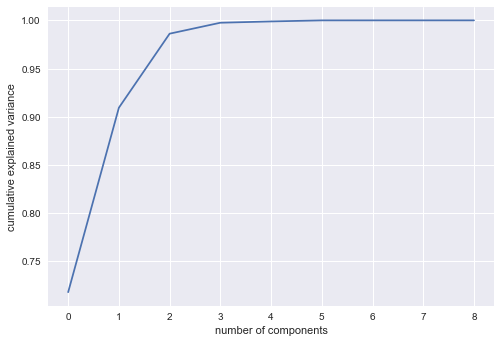

explained variance ratio: [0.71815741 0.9094298  0.98618815 0.99754186 0.99888563 0.99998675
 0.9999948  0.99999997 1.        ]
eigenvalues: [5.58897505e+01 1.48855478e+01 5.97362774e+00 8.83588927e-01
 1.04577328e-01 8.56931775e-02 6.26951229e-04 4.02029711e-04
 2.46184193e-06]


In [41]:
from sklearn.decomposition import PCA
pca = PCA().fit(feat.iloc[:,1:])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
print('explained variance ratio:',pca.explained_variance_ratio_.cumsum())
print('eigenvalues:',pca.explained_variance_)

In [42]:
#pca test with all the featers

pca_season = PCA(n_components = 6)
pca_2_season = pca_season.fit_transform(feat.iloc[:,1:])
new_data = pd.DataFrame(pca_2_season)
new_data.head()

,0,1,2,3,4,5
0,-9.990208,0.131658,-1.653800,-0.650345,0.233470,-0.524164
1,-10.258621,-5.497323,-1.113296,0.104449,0.224202,-0.330762
2,-11.946099,-2.719725,0.386758,0.621171,0.109793,-0.292302
3,-10.263482,-2.159189,-0.521479,-0.188786,-0.014471,-0.427355
4,-10.819638,-1.856717,-0.609822,0.077133,0.301040,-0.426219


# How are the 6 components formed?

Below is a dataframe that explaines the variances for each feature and for each component. By looking at the first row that represents PC1 we can see that PC1 is mostly aligned with OPIM/G and PIM/G. PC2 is mostly aligned with shots/G and (shots against)/game. PC5 is mostly aligned with GF/G and GA/G. It looks  like for PC1 mostly takes into account PIM/G and OPIM/G.  

In [43]:
pd.DataFrame(pca_season.components_,index= ['PC1','PC2','PC3','PC4','PC5','PC6'],columns= \
             ['PP%','PK%','GF/G','GA/G','PIM/G','OPIM/G','shots/G','shots against/game','SV%'])

,PP%,PK%,GF/G,GA/G,PIM/G,OPIM/G,shots/G,shots against/game,SV%
PC1,0.000589,-0.000630,0.031921,0.034350,0.714543,0.697785,-0.015889,0.008428,-0.001198
PC2,-0.001407,0.002053,-0.070500,-0.085520,-0.014915,0.017865,-0.623270,-0.773759,0.000189
PC3,-0.003646,-0.003465,-0.080959,0.062123,0.069859,-0.095901,-0.770656,0.617716,-0.000010
PC4,-0.000334,-0.001285,0.030422,-0.008877,-0.694967,0.707747,-0.080561,0.092837,0.000508
PC5,0.033184,-0.035319,0.735160,0.664744,-0.022347,-0.044496,-0.081012,-0.075954,-0.022254
PC6,-0.036706,-0.039168,-0.666063,0.736063,-0.029019,0.026276,0.065683,-0.072451,-0.024377


# Gaussian Naive Bayes With PCA Data

With the PCA data this model went from an accuracy score of about 78.993% to an accuracy score of about 85.0314% when using the PCA data.

In [44]:
gb_param = {'priors':[None]}
from sklearn.naive_bayes import GaussianNB
nb_pca_model = GridSearchCV(GaussianNB(),gb_param,cv = 10)
nb_pca_fitted_model = nb_pca_model.fit(new_data,target)
nb_pca_fitted_model.best_score_

0.8503144654088051

# K Nearest Neighbors With PCA DATA

The accuracy score for this model when not using PCA data is about the same as it is with pca data. Both model gave accuracy scores of about 70.44025%.

In [45]:
neigh = (np.arange(0,50,1) + 1)
param_nieghbors = {'n_neighbors':neigh,'weights':['uniform', 'distance'],'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
k_pca = GridSearchCV(KNeighborsClassifier(),param_nieghbors,cv = 10)
k_pca_model = k_pca.fit(new_data,target)
print(k_pca_model.best_score_)
print(k_pca_model.best_estimator_)

0.7044025157232704
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=41, p=2,
           weights='uniform')


# SVC With PCA Data

The SVC model with the PCA data was about 90.44%. This score was close to the accuracy score of the SVC model without the PCA Data which was about 90.314465%.

In [46]:
param_svc = {'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100],'kernel':['linear','rbf','sigmoid'], 'random_state':[42]}
svc_pca = GridSearchCV(SVC(probability=True),param_svc, cv = 10)
svc_pca_fit = svc_pca.fit(new_data,target)
print(svc_pca_fit.best_score_)
print(svc_pca_fit.best_estimator_)

0.9044025157232705
SVC(C=7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)


# Random Forest With PCA Data

This Random Forest model when given the PCA data gave an accuracy score of about 86.289% which is an in crease from the score of the random forest model with the non PCA data which was about 84.403%.

In [47]:
param_forest = {'n_estimators' : [2,5,1,8,7,10,50,200,100,1000,2000], 'max_depth' : [100,105,200,225,250,300,350,400,450,500]\
                ,'random_state':[42]}
forest_pca = GridSearchCV(RandomForestClassifier(),param_forest,cv = 10)
forest_model_pca = forest_pca.fit(new_data,target)
print(forest_model_pca.best_score_)
print(forest_model_pca.best_estimator_)

0.8628930817610063
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)


# Logistic Regression With PCA Data

This logistic regression model when given the PCA data had an accuracy score of about 90.063% which was close to the logistic regression model results when the model used non PCA data. 

In [48]:
param_log = {'C':[1,2,3,4,5,6,7,8,9,10],'random_state':[42],\
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag'],'max_iter':[100000]}
log_model_pca = GridSearchCV(LogisticRegression(),param_log, cv = 10)
log_model_pca_fit = log_model_pca.fit(new_data,target)
print(log_model_pca_fit.best_score_)
print(log_model_pca_fit.best_estimator_)

0.9006289308176101
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100000, multi_class='ovr',
          n_jobs=1, penalty='l2', random_state=42, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


# ANN With PCA Data

This ANN model used two hidden layers where the first hidden layer contained 15 nodes and the second layer contained 10 nodes. Both hidden layers used the sigmoid functionas their activation functions. The input layer has 15 nodes and uses the sigmoid activation function. The output layer has two nodes because there are two outcomes, and used the softmax activations fuction. This model used the adam optimizer and used 80% of the data to train and 20% of the data to test. This model gave an accuracy score of about 84.91% on the validation set.

In [49]:
model_pca = Sequential()
tar_ann = to_categorical(target)
early_stopping_monitor = EarlyStopping(patience = 2)
model_pca.add(Dense(15,activation='sigmoid', input_shape = (6,)))
model_pca.add(Dense(15,activation= 'sigmoid'))
model_pca.add(Dense(10,activation = 'sigmoid'))
# Add the output layer
model_pca.add(Dense(2,activation='softmax'))

model_pca.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

ann_model_pca =model_pca.fit(new_data,tar_ann,validation_split=.20,epochs=300,verbose=0)

In [50]:
pred_ann_pca = model_pca.predict_classes(new_data)
accuracy_score(target,pred_ann_pca)

0.9031446540880503

# Result Table 

Below is a table that shows all of the results from the sections above, except for the 2013 section. It is important to notice that all these results listed in the table were calculated with data from the years 1985 to 2017. Ann models used different number of hidden layers and nodes, so please see the sections above to see the structure of each model. Also look at the sections above to find the optimal hyper parameters for each model based on what type of data was used. 

In [51]:
pd.read_csv('hockey_project_results.csv',engine='python',index_col=[0])

,Unscaled,Scaled,PCA
Gaussian Naive Bayes,78.99,78.99,85.03
K Nearest Neighbors,70.44,82.14,70.44
SVC,90.31,89.81,90.44
Random Forest,84.40,84.40,86.29
Logistic Regression,90.32,89.31,90.06
Ann,86.16,84.34,84.91


# Which features are the most important?

This section uses ExtraTreesClassifier to estimate the importance of each feature of the original unscaled data. The dataframe below tells us that goals for per game is the most important followed by goals against per game. This makes sense because if a team on average scores more goals then they allow then they will most likley win more games and if they win more games then they will most likly make the playoffs. The next two important features look to be power play percentage and shots against per game.This classifier was ran with 1000 estimators and used a random state of 42.

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
model_im = ExtraTreesClassifier(n_estimators = 1000,random_state = 42)
model_im.fit(feat.iloc[:,1:],target)
importances = model_im.feature_importances_
pd.DataFrame(importances,\
             index=['PP%','PK%','GF/G','GA/G', 'PIM/G','OPIM/G','shots/game','shots_against/game', 'SV%']).T

,PP%,PK%,GF/G,GA/G,PIM/G,OPIM/G,shots/game,shots_against/game,SV%
0,0.108905,0.095714,0.221582,0.172355,0.054917,0.063118,0.083052,0.109896,0.090462


# 2014 Through 2016 Season Predictions 

In this section I decided to predict the playoff teams for the 2014 and 2016 seasons. I decided to only use SVC, Random Forest, Logistic Regression, and ANN for this section to see what teams were predicted to make the playoffs for the 2014 and 2016 seasons. The predictions for each model can be found below. The data that was used for each model is not scaled and include the seasons from 1985 to 2017 where the 2014 and 2016 data was excluded. The data for this section is unscaled and does not use PCA. I used grid search for all models and used 10 fold cross validation to test and train my data.

In [53]:
svc_14_17 = GridSearchCV(SVC(probability=True),param_svc, cv = 10)
svc_14_17_fit = svc_14_17.fit(rest_data_feat.iloc[:,1:], rest_data_target)
forest_14_17 = GridSearchCV(RandomForestClassifier(),param_forest,cv = 10)
forest_14_17_fit = forest_14_17.fit(rest_data_feat.iloc[:,1:], rest_data_target)
log_14_17 = GridSearchCV(LogisticRegression(),param_log, cv = 10)
log_14_17_fit = log_14_17.fit(rest_data_feat.iloc[:,1:], rest_data_target)

In [54]:
model_98_13 = Sequential()
tar_ann_98_13 = to_categorical(rest_data_target)
model_98_13.add(Dense(20,activation='sigmoid', input_shape = (9,)))
model_98_13.add(Dense(25,activation= 'sigmoid'))
model_98_13.add(Dense(25,activation = 'sigmoid'))
# Add the output layer
model_98_13.add(Dense(2,activation='softmax'))

model_98_13.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

ann_model_98_13 =model_98_13.fit(rest_data_feat.iloc[:,1:], tar_ann_98_13,validation_split=.20,epochs=500,verbose=0)

In [55]:
ann_2014_prob = model_98_13.predict(feat_2014.iloc[:,1:])
ann_2016_prob = model_98_13.predict(feat_2016.iloc[:,1:])
merged_ann_14 = pd.concat([feat_2014.iloc[:,0],pd.DataFrame(ann_2014_prob,columns=['no','yes']), season_2014.iloc[:,[-2,-1]]]\
                          ,axis = 1)
merged_ann_16 = pd.concat([feat_2016.iloc[:,0],pd.DataFrame(ann_2016_prob,columns=['no','yes']), season_2016.iloc[:,[-2,-1]]]\
                          ,axis = 1)
sorted_ann_14 = merged_ann_14.sort_values('yes', ascending = False)
sorted_ann_16 = merged_ann_16.sort_values('yes', ascending = False)
correct_ann_2014_playoffs = correct_format(sorted_ann_14)
correct_ann_2016_playoffs = correct_format(sorted_ann_16)

In [56]:
svc_14_prob = svc_14_17_fit.predict_proba(feat_2014.iloc[:,1:])
forest_14_prob = forest_14_17_fit.predict_proba(feat_2014.iloc[:,1:])
log_14_prob = log_14_17_fit.predict_proba(feat_2014.iloc[:,1:])
merged_svc_14 = pd.concat([feat_2014.iloc[:,0],pd.DataFrame(svc_14_prob,columns=['no','yes']), season_2014.iloc[:,[-2,-1]]]\
                          ,axis = 1)
merged_forest_14 = pd.concat([feat_2014.iloc[:,0],pd.DataFrame(forest_14_prob,columns=['no','yes']),\
                              season_2014.iloc[:,[-2,-1]]],axis = 1)
merged_log_14 = pd.concat([feat_2014.iloc[:,0],pd.DataFrame(log_14_prob,columns=['no','yes']), season_2014.iloc[:,[-2,-1]]]\
                          ,axis = 1)
sorted_svc_14 = merged_svc_14.sort_values('yes',ascending=False)
sorted_forest_14 = merged_forest_14.sort_values('yes',ascending=False)
sorted_log_14 = merged_log_14.sort_values('yes',ascending=False)
svc_14_correct_playoff= correct_format(sorted_svc_14)
forest_14_correct_playoff= correct_format(sorted_forest_14)
log_14_correct_playoff= correct_format(sorted_log_14)


# The Teams That Made The Playoffs in 2014

In [57]:
pd.DataFrame(season_2014_stats[season_2014_stats['playoff_1'] == 1].iloc[:,0])

,Unnamed: 1
0,Boston Bruins
1,Anaheim Ducks
2,Colorado Avalanche
3,San Jose Sharks
4,St. Louis Blues
5,Pittsburgh Penguins
6,Chicago Blackhawks
7,Tampa Bay Lightning
8,Montreal Canadiens
9,Los Angeles Kings


# SVC 2014 Playoff Predictions

predicted washington to make the playoffs instead of Detriot.

In [58]:
svc_14_correct_playoff

,Unnamed: 1,no,yes,division,conference
0,Boston Bruins,0.000001,0.999999,atlantic,east
7,Tampa Bay Lightning,0.101506,0.898494,atlantic,east
8,Montreal Canadiens,0.344546,0.655454,atlantic,east
5,Pittsburgh Penguins,0.020111,0.979889,metro,east
11,New York Rangers,0.081851,0.918149,metro,east
14,Columbus Blue Jackets,0.252612,0.747388,metro,east
1,Anaheim Ducks,0.003674,0.996326,pacific,west
3,San Jose Sharks,0.005057,0.994943,pacific,west
9,Los Angeles Kings,0.036368,0.963632,pacific,west
4,St. Louis Blues,0.003282,0.996718,central,west


# Random Forest 2014 Playoff Predictions

Predicted the Devils to make the playoffs instead of the Flyers.

In [59]:
forest_14_correct_playoff

,Unnamed: 1,no,yes,division,conference
0,Boston Bruins,0.024,0.976,atlantic,east
7,Tampa Bay Lightning,0.108,0.892,atlantic,east
8,Montreal Canadiens,0.142,0.858,atlantic,east
11,New York Rangers,0.056,0.944,metro,east
5,Pittsburgh Penguins,0.070,0.930,metro,east
14,Columbus Blue Jackets,0.237,0.763,metro,east
3,San Jose Sharks,0.032,0.968,pacific,west
1,Anaheim Ducks,0.058,0.942,pacific,west
9,Los Angeles Kings,0.182,0.818,pacific,west
4,St. Louis Blues,0.003,0.997,central,west


# Logistic Regression 2014 Playoff Predictions

Predicted Washington would make instead of Detroit.

In [60]:
log_14_correct_playoff

,Unnamed: 1,no,yes,division,conference
0,Boston Bruins,0.000556,0.999444,atlantic,east
7,Tampa Bay Lightning,0.103454,0.896546,atlantic,east
8,Montreal Canadiens,0.336845,0.663155,atlantic,east
5,Pittsburgh Penguins,0.020149,0.979851,metro,east
11,New York Rangers,0.085751,0.914249,metro,east
14,Columbus Blue Jackets,0.248853,0.751147,metro,east
1,Anaheim Ducks,0.004053,0.995947,pacific,west
3,San Jose Sharks,0.006071,0.993929,pacific,west
9,Los Angeles Kings,0.038265,0.961735,pacific,west
4,St. Louis Blues,0.003068,0.996932,central,west


# ANN 2014 Playoff Predictions

Predicted all of the correct teams.

In [61]:
correct_ann_2014_playoffs

,Unnamed: 1,no,yes,division,conference
0,Boston Bruins,0.000417,0.999583,atlantic,east
7,Tampa Bay Lightning,0.015456,0.984544,atlantic,east
8,Montreal Canadiens,0.101998,0.898002,atlantic,east
5,Pittsburgh Penguins,0.003536,0.996464,metro,east
11,New York Rangers,0.007283,0.992717,metro,east
14,Columbus Blue Jackets,0.049174,0.950826,metro,east
3,San Jose Sharks,0.000854,0.999146,pacific,west
1,Anaheim Ducks,0.001936,0.998064,pacific,west
9,Los Angeles Kings,0.005574,0.994426,pacific,west
6,Chicago Blackhawks,0.000947,0.999053,central,west


# 2016 Playoff Teams

In [62]:
pd.DataFrame(season_2016_stats[season_2016_stats['playoff_1'] == 1].iloc[:,0])

,Unnamed: 1
0,Washington Capitals
1,Dallas Stars
2,St. Louis Blues
3,Pittsburgh Penguins
4,Anaheim Ducks
5,Florida Panthers
6,Chicago Blackhawks
7,Los Angeles Kings
8,New York Rangers
9,New York Islanders


In [63]:
svc_16_prob = svc_14_17_fit.predict_proba(feat_2016.iloc[:,1:])
forest_16_prob = forest_14_17_fit.predict_proba(feat_2016.iloc[:,1:])
log_16_prob = log_14_17_fit.predict_proba(feat_2016.iloc[:,1:])
merged_svc_16 = pd.concat([feat_2016.iloc[:,0],pd.DataFrame(svc_16_prob,columns=['no','yes']), season_2016.iloc[:,[-2,-1]]]\
                          ,axis = 1)
merged_forest_16 = pd.concat([feat_2016.iloc[:,0],pd.DataFrame(forest_16_prob,columns=['no','yes']),\
                              season_2016.iloc[:,[-2,-1]]],axis = 1)
merged_log_16 = pd.concat([feat_2016.iloc[:,0],pd.DataFrame(log_16_prob,columns=['no','yes']), season_2016.iloc[:,[-2,-1]]]\
                          ,axis = 1)
sorted_svc_16 = merged_svc_16.sort_values('yes',ascending=False)
sorted_forest_16 = merged_forest_16.sort_values('yes',ascending=False)
sorted_log_16 = merged_log_16.sort_values('yes',ascending=False)
svc_16_correct_playoff= correct_format(sorted_svc_16)
forest_16_correct_playoff= correct_format(sorted_forest_16)
log_16_correct_playoff= correct_format(sorted_log_16)

# SVC 2016 Playoff Predictions

Predicted that Boston would make the playoffs instead of Detroit.

In [64]:
svc_16_correct_playoff

,Unnamed: 1,no,yes,division,conference
5,Florida Panthers,0.055404,0.944596,atlantic,east
11,Tampa Bay Lightning,0.100508,0.899492,atlantic,east
14,Boston Bruins,0.266533,0.733467,atlantic,east
0,Washington Capitals,0.006053,0.993947,metro,east
3,Pittsburgh Penguins,0.021512,0.978488,metro,east
9,New York Islanders,0.259852,0.740148,metro,east
10,San Jose Sharks,0.036069,0.963931,pacific,west
7,Los Angeles Kings,0.056596,0.943404,pacific,west
4,Anaheim Ducks,0.078603,0.921397,pacific,west
1,Dallas Stars,0.027084,0.972916,central,west


# Random Forest 2016 Playoff Predictions

Predicted that Boston would make the playoffs instead of Detroit.

In [65]:
forest_16_correct_playoff

,Unnamed: 1,no,yes,division,conference
11,Tampa Bay Lightning,0.054,0.946,atlantic,east
5,Florida Panthers,0.114,0.886,atlantic,east
14,Boston Bruins,0.201,0.799,atlantic,east
3,Pittsburgh Penguins,0.073,0.927,metro,east
0,Washington Capitals,0.083,0.917,metro,east
8,New York Rangers,0.155,0.845,metro,east
4,Anaheim Ducks,0.045,0.955,pacific,west
10,San Jose Sharks,0.054,0.946,pacific,west
7,Los Angeles Kings,0.076,0.924,pacific,west
13,Nashville Predators,0.108,0.892,central,west


# Logistic Regression 2016 Playoff Predictions

Predicted that Boston would make the playoffs instead of Detroit.

In [66]:
log_16_correct_playoff

,Unnamed: 1,no,yes,division,conference
5,Florida Panthers,0.054506,0.945494,atlantic,east
11,Tampa Bay Lightning,0.106690,0.893310,atlantic,east
14,Boston Bruins,0.260978,0.739022,atlantic,east
0,Washington Capitals,0.005736,0.994264,metro,east
3,Pittsburgh Penguins,0.022875,0.977125,metro,east
8,New York Rangers,0.264292,0.735708,metro,east
10,San Jose Sharks,0.040679,0.959321,pacific,west
7,Los Angeles Kings,0.053112,0.946888,pacific,west
4,Anaheim Ducks,0.070291,0.929709,pacific,west
1,Dallas Stars,0.028296,0.971704,central,west


#  ANN 2016 Playoff Predictions

Predicted that Boston would make the playoffs instead of Detroit.

In [67]:
correct_ann_2016_playoffs

,Unnamed: 1,no,yes,division,conference
5,Florida Panthers,0.008071,0.991929,atlantic,east
11,Tampa Bay Lightning,0.016001,0.983999,atlantic,east
14,Boston Bruins,0.049251,0.950749,atlantic,east
0,Washington Capitals,0.000858,0.999142,metro,east
3,Pittsburgh Penguins,0.001501,0.998499,metro,east
8,New York Rangers,0.025555,0.974445,metro,east
10,San Jose Sharks,0.004663,0.995337,pacific,west
7,Los Angeles Kings,0.005596,0.994404,pacific,west
4,Anaheim Ducks,0.013681,0.986319,pacific,west
1,Dallas Stars,0.002257,0.997743,central,west


# Conclusion

In this project I built multiple models to predict weither or not a team would make the NHL playoffs. I also used probabilities for each team to see how probable it was for each team to make the play offs. I used NHL playoff selection methods to select season playoff prreditions based on the predictions of each model. I ran each model with scaled data, unscaled data, and PCA data. I also showed an example of season data that used different playoff selection methods and had different conferences and divisions then we are accustom to. Over all I believe that the SVC, logistic regression model, and ANN model gave me my best results for any type of data and were pretty good at making end of the season playoff predictions. Overall I believe that all the models preformed the best when using unscaled data because none of the features contained any outliers and all the features had values that were close together. Over all the min max scaler method was the best scaling method for this data. Future research may include incorporating player stats and team head to head stats for more meaningful games. These models also need to be ran with data that is truly midseason data and see how close those predictions are to the true playoff teams outcome.